In [1]:
from google.colab import drive
# drive.mount('/content/drive/MyDrive/IITP/sohyun/creditcard_prediction/data')
drive.mount('/content/drive')

%cd drive/MyDrive/IITP/sohyun/TimeSeriesAnomaly/data/modify

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1j1N0u5t0l99N_wfSd5UZvnhugzn5g_NC/TimeSeriesAnomaly/data/modify


In [2]:
import matplotlib.pyplot as plt
import easydict
from sklearn.preprocessing import StandardScaler
import random
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import f1_score
import time

## Data 

In [ ]:
#---# UNZIP #---#
# !unzip -qq "180219_Signal Modulation Test_Abnormal_01.zip"

# !unzip -qq "180220_Signal Modulation Test_Abnormal_01.zip"
# !unzip -qq "180220_Signal Modulation Test_Normal_00.zip"

# !unzip -qq "180221_Signal Modulation Test_Abnormal_01.zip"
# !unzip -qq "180221_Signal Modulation Test_Normal_00.zip"

# !unzip -qq "180222_Signal Modulation Test_Abnormal_01.zip"
# !unzip -qq "180222_Signal Modulation Test_Normal_00.zip"

#---# Road original data #---#
# data_20 = pd.read_csv('180220_Signal Modulation Test_Normal_00_5_100ms_sujeong.csv', skiprows=[1,2], header=0)

# data_21_ab = pd.read_csv('180221_Signal Modulation Test_Abnormal_01_5_100ms_sujeong.csv', skiprows=[1,2], header=0)
# data_21 = pd.read_csv('180221_Signal Modulation Test_Normal_00_5_100ms_sujeong.csv', skiprows=[1,2], header=0)

# data_22_ab = pd.read_csv('180222_Signal Modulation Test_Abnormal_01_5_100ms_sujeong.csv', skiprows=[1,2], header=0)
# data_22 = pd.read_csv('180222_Signal Modulation Test_Normal_00_5_100ms_sujeong.csv', skiprows=[1,2], header=0)

data_20 = pd.read_csv('180220_Signal Modulation Test_Normal_00_5_10ms_sujeong.csv', skiprows=[1,2], header=0)

data_21_ab = pd.read_csv('180221_Signal Modulation Test_Abnormal_01_5_10ms_sujeong.csv', skiprows=[1,2], header=0)
data_21 = pd.read_csv('180221_Signal Modulation Test_Normal_00_5_10ms_sujeong.csv', skiprows=[1,2], header=0)

data_22_ab = pd.read_csv('180222_Signal Modulation Test_Abnormal_01_5_10ms_sujeong.csv', skiprows=[1,2], header=0)
data_22 = pd.read_csv('180222_Signal Modulation Test_Normal_00_5_10ms_sujeong.csv', skiprows=[1,2], header=0)

#---# Plotting #---#
# for i in range(1,252) :
#   plt.figure(figsize=(30,5))
#   plt.plot(data_21_ab.iloc[:,i]) # 70 column
#   print(i)
#   plt.show()

###  
###
'''
plt.figure(figsize=(30,5))
plt.plot(data22.iloc[:,70])
plt.show()
'''

Fu_p_20 = data_20.iloc[:,1].values
Fu_p_21 = data_21.iloc[:,1].values
Fu_p_21_ab = data_21_ab.iloc[:,1].values
Fu_p_22 = data_22.iloc[:,1].values
Fu_p_22_ab = data_22_ab.iloc[:,1].values

#---# SAVE npy file #---#
np.save('Fu_20_normal_10', Fu_p_20)
np.save('Fu_21_normal_10', Fu_p_21)
np.save('Fu_21_abnormal_10', Fu_p_21_ab)
np.save('Fu_22_normal_10', Fu_p_22)
np.save('Fu_22_abnormal_10', Fu_p_22_ab)

#---# 데이터 확인 #---#
print(data_22.shape, data_22_ab.shape, data_21.shape, data_21_ab.shape, data_20.shape)
print(set(data_22.columns) - set(data_21.columns))
plt.figure(figsize=(30,5))
plt.plot(data_22_ab[['Fu_uPMean\\ETKC:1']])
# plt.plot(data_21_ab[['Fu_uPMean\\ETKC:1']])

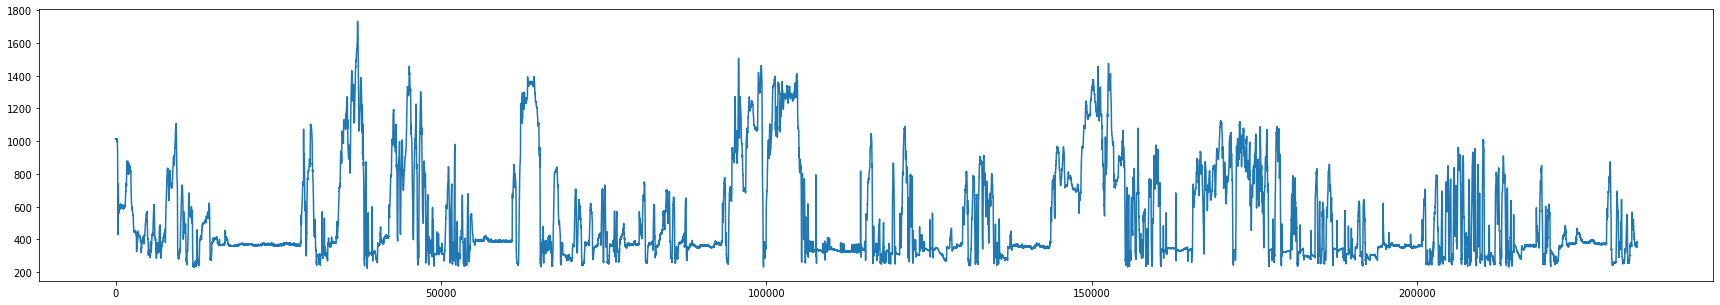

In [3]:
#---# LOAD npy file #---#
Fu_20_normal = np.load('Fu_20_normal.npy')
Fu_21_normal = np.load('Fu_21_normal.npy')
Fu_21_abnormal = np.load('Fu_21_abnormal.npy')
Fu_22_normal = np.load('Fu_22_normal.npy')
Fu_22_abnormal = np.load('Fu_22_abnormal.npy')

Fu_20_normal_10 = np.load('Fu_20_normal_10.npy')
Fu_21_normal_10 = np.load('Fu_21_normal_10.npy')
Fu_21_abnormal_10 = np.load('Fu_21_abnormal_10.npy')
Fu_22_normal_10 = np.load('Fu_22_normal_10.npy')
Fu_22_abnormal_10 = np.load('Fu_22_abnormal_10.npy')

# import sys
# np.set_printoptions(threshold=sys.maxsize) # print all

#---# 확인용 #---#
plt.figure(figsize=(30,5))
plt.plot(Fu_22_abnormal_10)

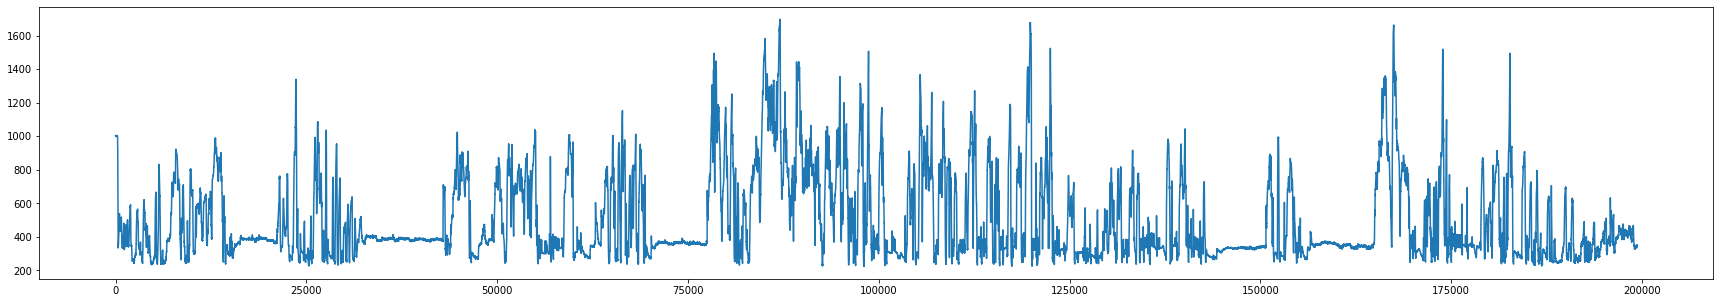

In [4]:
plt.figure(figsize=(30,5))
plt.plot(Fu_22_normal_10)